In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [3]:
energy = pd.read_csv("C:\\Users\\cb7en\\OneDrive\\Documentos\\Stats Master - Wei\\Project\\Monthly\\energy_type_result.csv",index_col='Date', parse_dates=True)
energy

C:\Users\cb7en\AppData\Local\Temp\ipykernel_29628\4104810330.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  energy = pd.read_csv("C:\\Users\\cb7en\\OneDrive\\Documentos\\Stats Master - Wei\\Project\\Monthly\\energy_type_result.csv",index_col='Date', parse_dates=True)


,Green,Non-Green
Date,,
08-Jan,11545538,3324661
08-Feb,10272058,3578838
08-Mar,9999891,3723213
08-Apr,9918985,2759306
08-May,10225934,2255208
...,...,...
24-Apr,10322978,1684840
24-May,10468081,2136845
24-Jun,11194567,1960533


In [4]:
energy ['DATE'] = pd.to_datetime(energy.index , format='%y-%b')
energy ['DATE'].dt.year

Date
08-Jan    2008
08-Feb    2008
08-Mar    2008
08-Apr    2008
08-May    2008
          ... 
24-Apr    2024
24-May    2024
24-Jun    2024
24-Jul    2024
24-Aug    2024
Name: DATE, Length: 200, dtype: int32

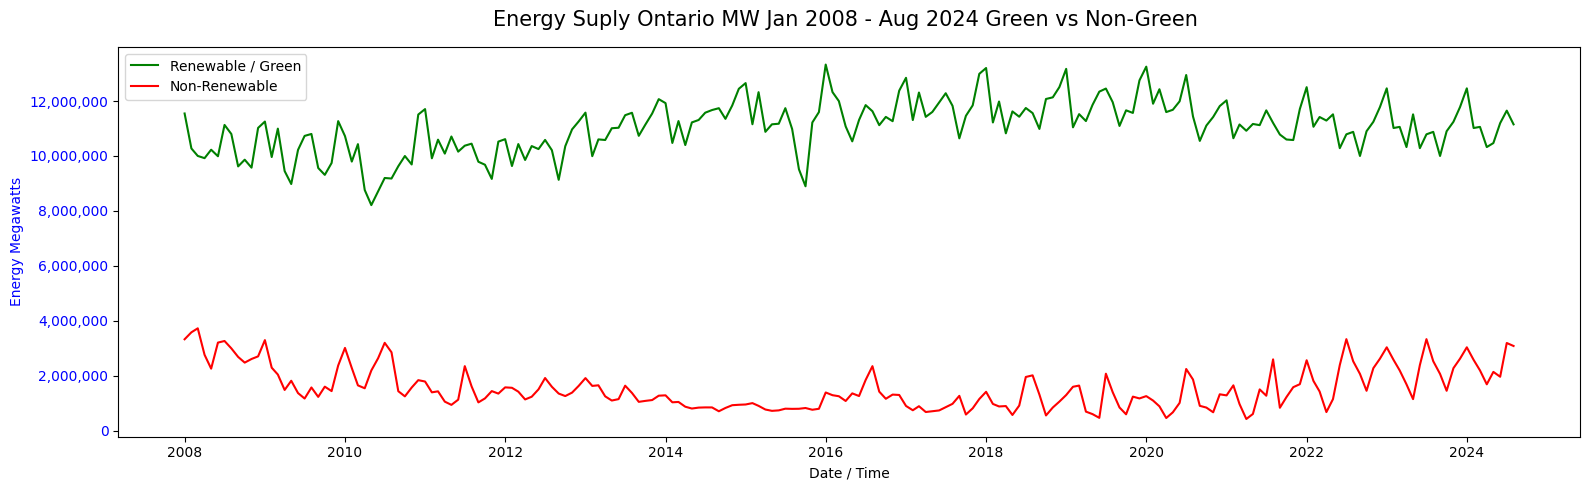

In [5]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(16,5))

# Plot first dataset on primary y-axis (left)
ax1.plot(energy['DATE'], energy['Green'], color = 'green', label='Renewable / Green')
ax1.plot(energy['DATE'], energy['Non-Green'], color ='red', label='Non-Renewable')
ax1.set_xlabel('Date / Time')
ax1.set_ylabel('Energy Megawatts', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add titles and adjust layout
plt.title("Energy Suply Ontario MW Jan 2008 - Aug 2024 Green vs Non-Green ",fontsize=15, pad=15)
fig.tight_layout()

# Add legends
ax1.legend(loc='upper left')
fig=plt.gcf()
fig.savefig("pics\\energy_16.png", dpi=300)
# Display the plot
plt.show()

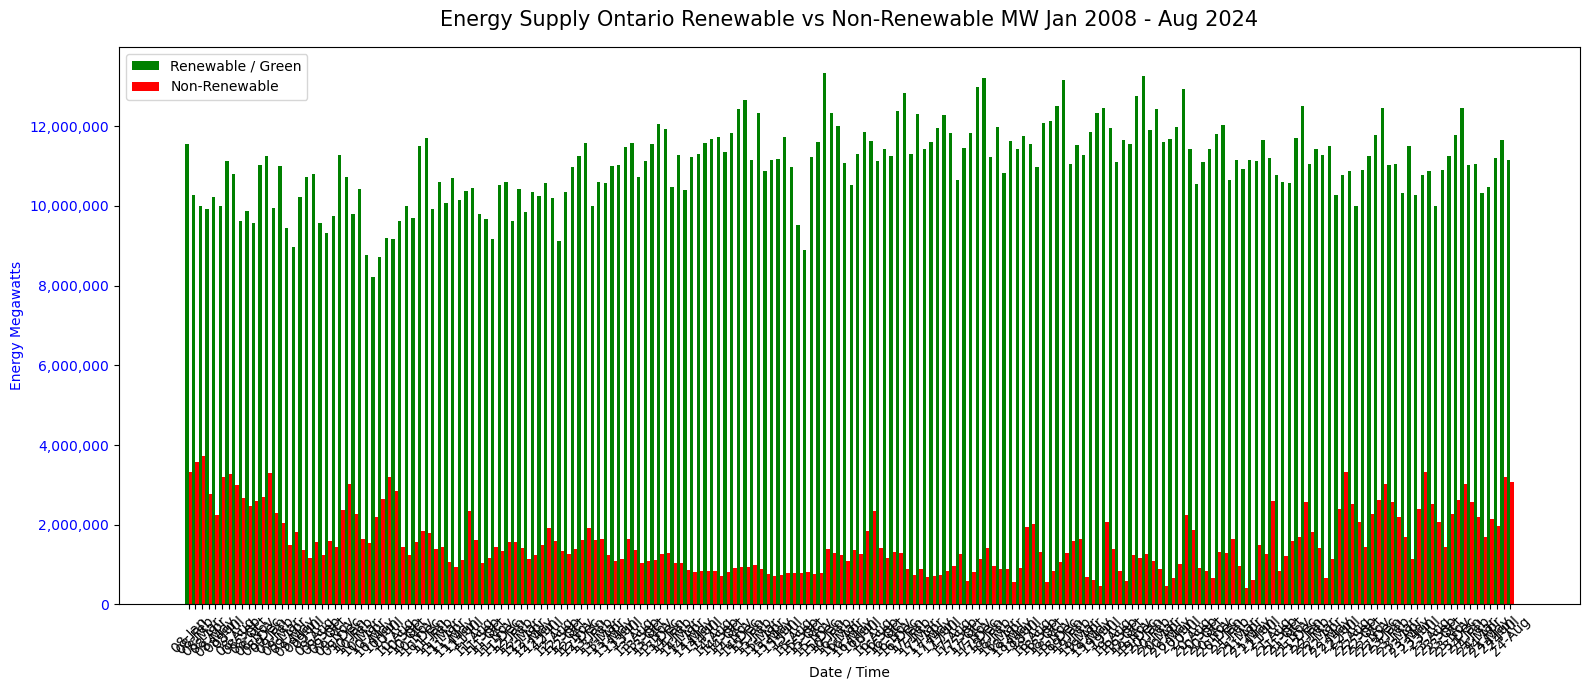

In [15]:
fig, ax1 = plt.subplots(figsize=(16, 7))

# Set the width of the bars
bar_width = 0.5

# Set the positions of the bars on the x-axis
r1 = np.arange(len(energy['DATE']))  # Positions for Green bars
r2 = [x + bar_width for x in r1]     # Positions for Non-Green bars (shifted by bar_width)

ax1.bar(r1, energy['Green'], color='green', width=bar_width, label='Renewable / Green')
ax1.bar(r2, energy['Non-Green'], color='red', width=bar_width, label='Non-Renewable')

# Set x-axis labels (dates)
ax1.set_xlabel('Date / Time')
ax1.set_xticks([r + bar_width/2 for r in range(len(energy['DATE']))])  # Center the ticks between the bars
ax1.set_xticklabels(energy['DATE'].index, rotation=45)
# Set y-axis label and formatting
ax1.set_ylabel('Energy Megawatts', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add title
plt.title("Energy Supply Ontario Renewable vs Non-Renewable MW Jan 2008 - Aug 2024", fontsize=15, pad=15)

# Add legend
ax1.legend(loc='upper left')

# Adjust layout to prevent label cutoff
fig.tight_layout()

# Display the plot
plt.show()

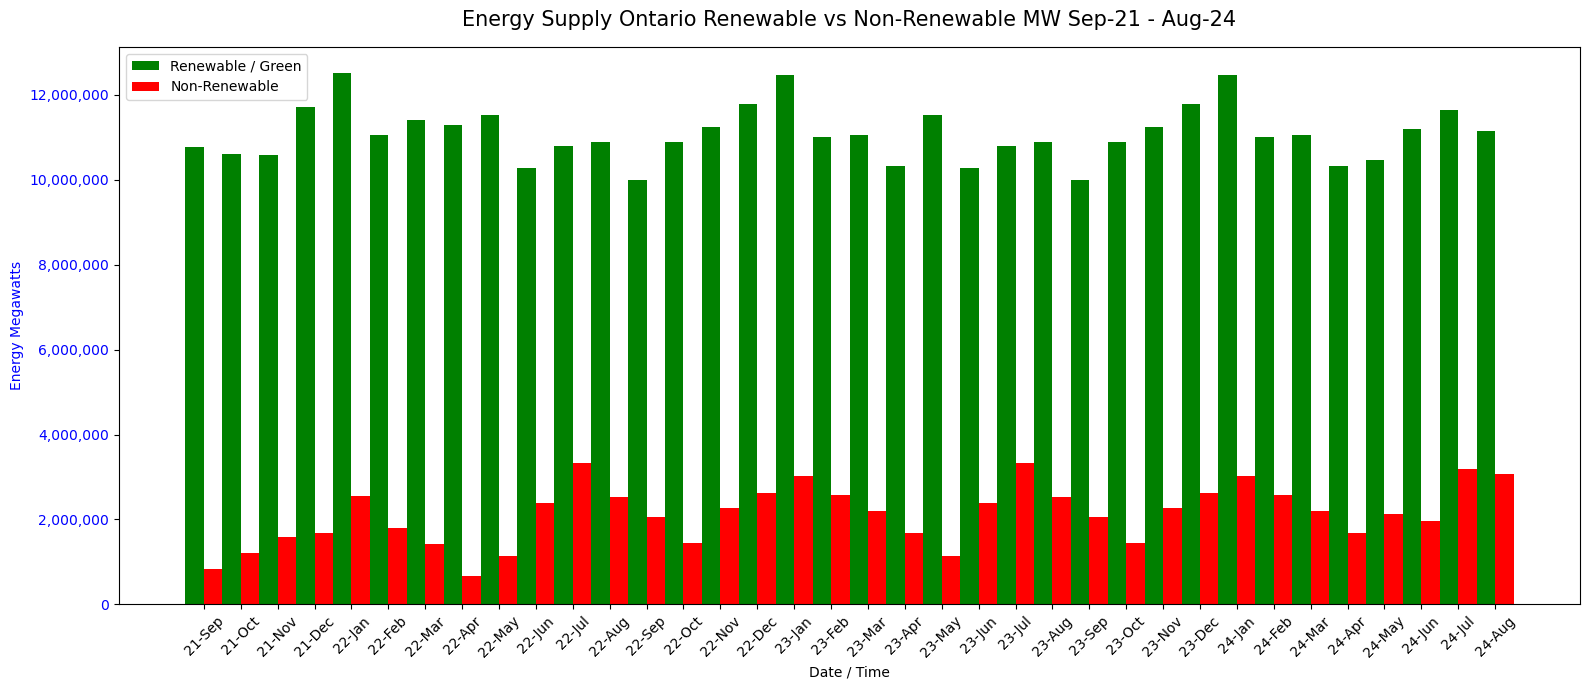

In [17]:
fig, ax1 = plt.subplots(figsize=(16, 7))

# Set the width of the bars
bar_width = 0.5

# Set the positions of the bars on the x-axis
r1 = np.arange(len(energy['DATE'].iloc[-36:]))  # Positions for Green bars
r2 = [x + bar_width for x in r1]     # Positions for Non-Green bars (shifted by bar_width)

ax1.bar(r1, energy['Green'].iloc[-36:], color='green', width=bar_width, label='Renewable / Green')
ax1.bar(r2, energy['Non-Green'].iloc[-36:], color='red', width=bar_width, label='Non-Renewable')

# Set x-axis labels (dates)
ax1.set_xlabel('Date / Time')
ax1.set_xticks([r + bar_width/2 for r in range(len(energy['DATE'].iloc[-36:]))])  # Center the ticks between the bars
ax1.set_xticklabels(energy['DATE'].iloc[-36:].index, rotation=45)
# Set y-axis label and formatting
ax1.set_ylabel('Energy Megawatts', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add title
plt.title("Energy Supply Ontario Renewable vs Non-Renewable MW Sep-21 - Aug-24", fontsize=15, pad=15)

# Add legend
ax1.legend(loc='upper left')

# Adjust layout to prevent label cutoff
fig.tight_layout()

# Display the plot
plt.show()

In [19]:
energy

,Green,Non-Green,DATE
Date,,,
08-Jan,11545538,3324661,2008-01-01
08-Feb,10272058,3578838,2008-02-01
08-Mar,9999891,3723213,2008-03-01
08-Apr,9918985,2759306,2008-04-01
08-May,10225934,2255208,2008-05-01
...,...,...,...
24-Apr,10322978,1684840,2024-04-01
24-May,10468081,2136845,2024-05-01
24-Jun,11194567,1960533,2024-06-01


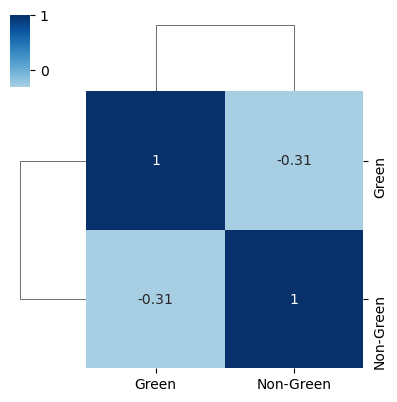

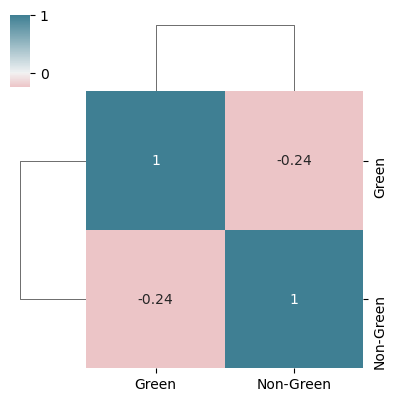

In [21]:
import seaborn as sns

sns.clustermap(energy[['Green','Non-Green']].corr('spearman'), figsize=(4, 4),annot=True, center=0, cmap='Blues')
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.clustermap(energy[['Green','Non-Green']].corr(), figsize=(4, 4), annot=True, cmap=cmap, center=0);

In [63]:
energy2 = energy.set_index('DATE')

sum_energy = energy2.resample('YE').sum()
sum_energy.drop(sum_energy.index[-1], inplace=True)

In [65]:
sum_energy

,Green,Non-Green
DATE,,
2008-12-31,123953589,35567073
2009-12-31,122263171,21655154
2010-12-31,115818927,25428144
2011-12-31,123133125,16663156
2012-12-31,123636597,17540854
2013-12-31,133324380,16188414
2014-12-31,137208242,10943370
2015-12-31,133268909,9830297
2016-12-31,140221795,16990322


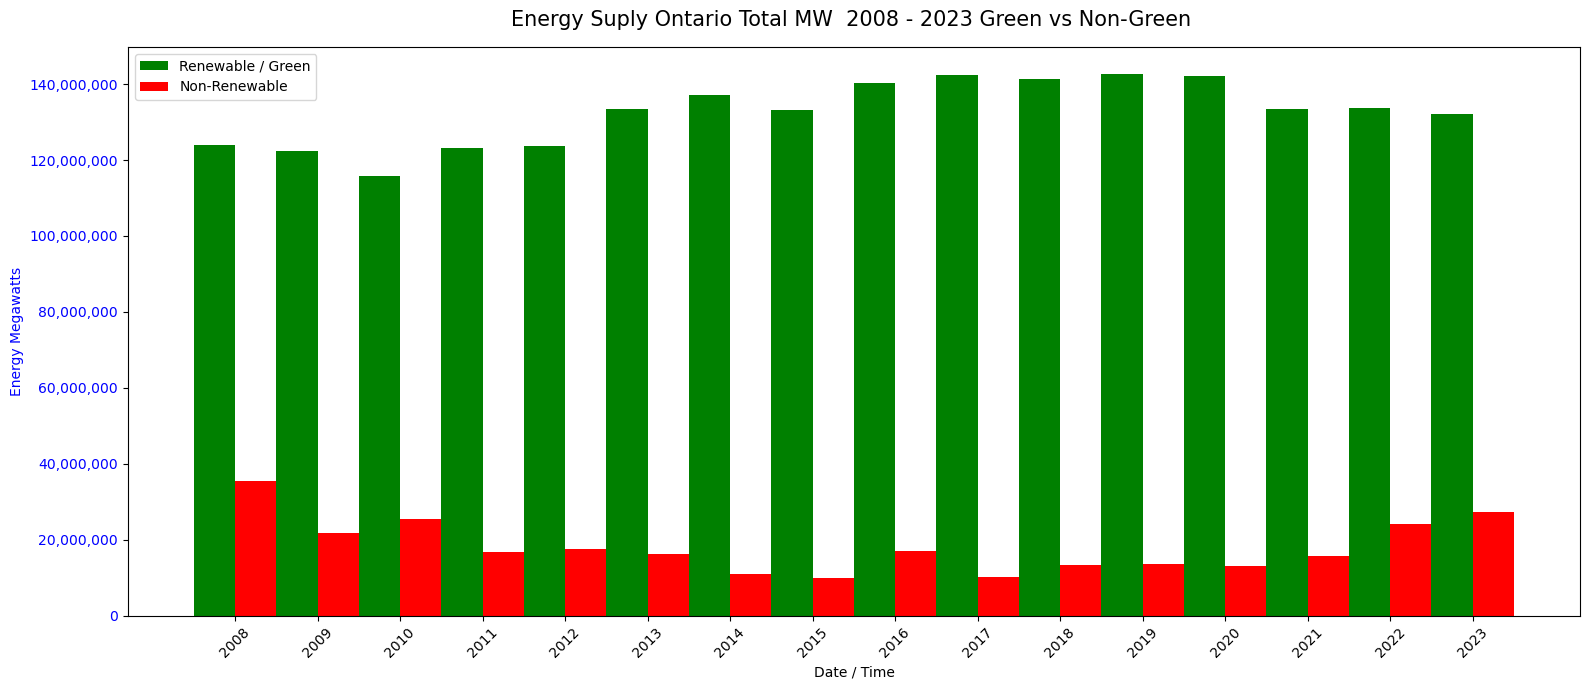

In [75]:
fig, ax1 = plt.subplots(figsize=(16, 7))

# Set the width of the bars
bar_width = 0.5

# Set the positions of the bars on the x-axis
r1 = np.arange(len(sum_energy))  # Positions for Green bars
r2 = [x + bar_width for x in r1]     # Positions for Non-Green bars (shifted by bar_width)

ax1.bar(r1, sum_energy['Green'], color='green', width=bar_width, label='Renewable / Green')
ax1.bar(r2, sum_energy['Non-Green'], color='red', width=bar_width, label='Non-Renewable')

# Set x-axis labels (dates)
ax1.set_xlabel('Date / Time')
ax1.set_xticks([r + bar_width/2 for r in range(len(sum_energy))])  # Center the ticks between the bars
ax1.set_xticklabels(sum_energy.index.year, rotation=45)
# Set y-axis label and formatting
ax1.set_ylabel('Energy Megawatts', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add title
plt.title("Energy Suply Ontario Total MW  2008 - 2023 Green vs Non-Green ", fontsize=15, pad=15)

# Add legend
ax1.legend(loc='upper left')

# Adjust layout to prevent label cutoff
fig.tight_layout()

# Display the plot
plt.show()

In [23]:
forecast_data = pd.read_csv("C:\\Users\\cb7en\\OneDrive\\Documentos\\Stats Master - Wei\\Project\\Monthly\\energy_Forecast.csv", index_col='datetime', parse_dates=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
forecast_data

,predicted_energy,lower_bound,upper_bound,adjusted_predicted_energy,adjusted_lower_bound,adjusted_upper_bound
datetime,,,,,,
2025-01-31,"12,872,515.49","11,764,114.31","13,980,916.67","13,461,609.84","12,353,208.66","14,570,011.02"
2025-02-28,"12,216,125.02","11,107,723.85","13,324,526.20","12,262,621.12","11,154,219.95","13,371,022.30"
2025-03-31,"11,458,048.22","10,349,647.04","12,566,449.39","12,382,877.35","11,274,476.18","13,491,278.53"
2025-04-30,"10,793,146.76","9,684,745.58","11,901,547.94","12,685,697.41","11,577,296.24","13,794,098.59"
2025-05-31,"10,482,586.04","9,374,184.86","11,590,987.21","10,710,333.66","9,601,932.48","11,818,734.84"
2025-06-30,"11,036,162.75","9,927,761.57","12,144,563.93","11,356,306.99","10,247,905.81","12,464,708.17"
2025-07-31,"12,393,981.17","11,285,579.99","13,502,382.35","14,619,855.39","13,511,454.21","15,728,256.57"
2025-08-31,"12,120,259.84","11,011,858.67","13,228,661.02","13,626,736.17","12,518,334.99","14,735,137.35"
2025-09-30,"11,013,642.58","9,905,241.41","12,122,043.76","11,375,590.00","10,267,188.82","12,483,991.18"


In [79]:
yearly = forecast_data.resample('YE').sum()
yearly[['adjusted_predicted_energy', 'adjusted_lower_bound','adjusted_upper_bound']]

,adjusted_predicted_energy,adjusted_lower_bound,adjusted_upper_bound
datetime,,,
2025-12-31,"149,016,343.67","135,715,529.54","162,317,157.82"
2026-12-31,"148,205,730.58","134,904,916.42","161,506,544.70"
2027-12-31,"165,258,644.76","151,957,830.62","178,559,458.88"
2028-12-31,"176,661,802.06","163,360,987.91","189,962,616.20"
2029-12-31,"194,481,659.22","181,180,845.08","207,782,473.34"


In [77]:
sum_energy

,Green,Non-Green
DATE,,
2008-12-31,123953589,35567073
2009-12-31,122263171,21655154
2010-12-31,115818927,25428144
2011-12-31,123133125,16663156
2012-12-31,123636597,17540854
2013-12-31,133324380,16188414
2014-12-31,137208242,10943370
2015-12-31,133268909,9830297
2016-12-31,140221795,16990322
